# Random walk, con't

In the first notebook of the open course [**"Practical Numerical Methods with Python"**](http://openedx.seas.gwu.edu/courses/GW/MAE6286/2014_fall/about) we discussed how the spreading of a quantity such as the concentration of food dye in a liquid could be described through a diffusion equation. We also started to consider another method which involves the modeling of the trajectories of the molecules. Now that we have learned more about random numbers in the second notebook of this module, we are ready to move forward and implement this second method.

## Stochastic equation for Brownian motion

The model equation we introduced for the evolution of the velocity of a molecule of dye is:

$$
dv=v(t+dt)−v(t)=μdt+ds
$$

In order to compute the actual trajectory, this equation has to be supplement by the one describing the evolution of the position $x$:

$$
dx=x(t+dt)−x(t)=vdt
$$

As a reminder, in the equation for $v$, the term $\mu dt$ represents a contribution coming from the deterministic forces and $ds$ is the velocity change due to what we called the stochastic forces. It is this part that we need to properly model. An equation containing a stochastic contribution is known as a *stochastic equation*. There are many phenomena that are modelled with such equations; besides Brownian motion, we will also look at this type of equation for the modelling of financial instruments like options.

Focusing for now on Brownian motion, let's see what happens if we model $ds$ as:

$$
ds=\alpha \sqrt{dt}\cal{N(0,1)}
$$

where $\alpha$ is the same diffusion coefficient that one would use in the diffusion equation. Moreover, at time step, $\cal{N(0,1)}$ is a random number that is generated from a normal (Gaussian) distribution $f(n)$, centered around $0$, and with variance equal to $1$. That is:

$$
f(n)=\frac{1}{2\pi}e^{-\frac12 n^2}
$$

In the above equations, we assumed for simplicity that the Brownian motion takes place in a one-dimensional system. It is easy to extend the model to 2D or 3D problems by adding an identical set of equations for each extra dimension. 

### Integration of stochastic motion

It's now time to integrate our stochastic equation. We begin by importing our usual set of libraries:

In [1]:
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

For this first case, we will track a particle originally at rest at $x=0$. We also do not consider any deterministic force.

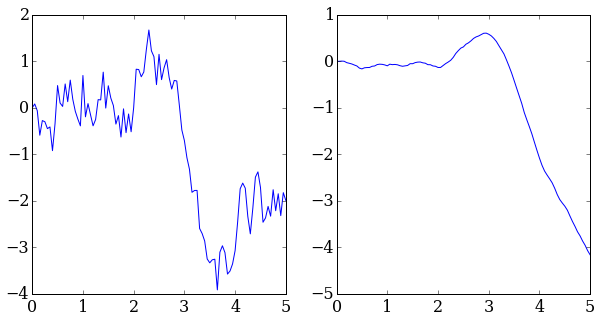

In [2]:
# Total simulation time
T=5.0

# Number of time steps and time interval dt
nt=100
dt=T/nt

# Diffusion coefficient
alpha=2.0

# Particle positions and initial condition
t = numpy.arange(0,T+dt,dt)
x = numpy.empty(nt+1)
v = numpy.empty(nt+1)
x[0]=0
v[0]=0

# Time integration
for i in range(nt):
    v[i+1]=v[i]+alpha*numpy.sqrt(dt)*numpy.random.normal(0,1)
    x[i+1]=x[i]+v[i]*dt
    
fig1 = pyplot.figure(figsize=(10,5))
pyplot.subplot(1, 2, 1)
pyplot.plot(t,v)
pyplot.subplot(1, 2, 2)
pyplot.plot(t,x)



### Comparison with the diffusion equation

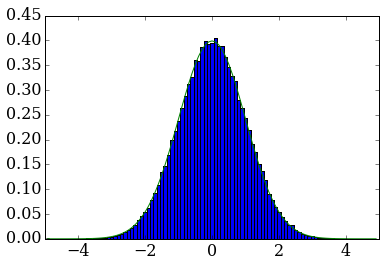

In [3]:
# Generate a set of initial positions based on the Gaussian distribution
npart=100000
x0 = numpy.random.normal(0,1,npart)

# Generate bins centered around 0
binwidth=0.1
bins=numpy.arange(-5,5,binwidth)
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

# Plot the histogram and expected distribution
pyplot.xlim(-5,5)
pyplot.hist(x0,bins,normed=True);
pyplot.plot(bin_centers, numpy.exp(-bin_centers**2/2.0)/numpy.sqrt(2*numpy.pi))

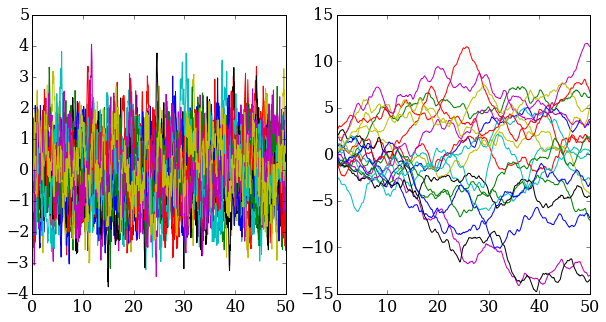

In [4]:
T=50.0
nt=1000
dt=T/nt
alpha=2.0

t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])
v = numpy.empty([nt+1,npart])

x[0]=x0
v[0]=0
for i in range(nt):
    v[i+1]=v[i]*(1-alpha*dt)+alpha*numpy.sqrt(dt)*numpy.random.normal(0,1,npart)
    x[i+1]=x[i]+v[i]*dt

fig = pyplot.figure(figsize=(10,5))
pyplot.subplot(1, 2, 1)
for i in range(20):
    pyplot.plot(t,v[:,i])
    
pyplot.subplot(1, 2, 2)
for i in range(20):
    pyplot.plot(t,x[:,i])


    



    

7.10183437759


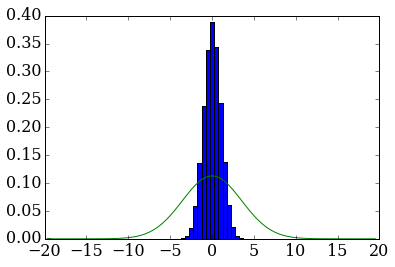

In [5]:
# Generate bins centered around 0
binwidth=0.5
bins=numpy.arange(-20,20,binwidth)
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

print(numpy.std(x[nt]))
# plot a histrogram for verification
pyplot.hist(v[nt],bins,normed=True);
alpha=0.5
pyplot.plot(bin_centers, numpy.exp(-bin_centers**2/(2.0*alpha**2*T))\
                            / numpy.sqrt(2*numpy.pi*alpha**2*T))

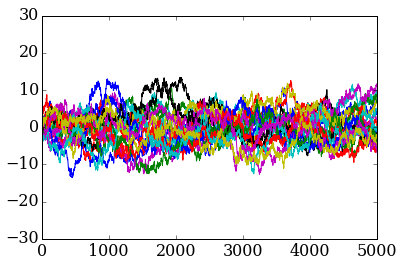

In [6]:
T=100.0
nt=5000
dt=T/nt
alpha=2.0
gamma=0.1

xd = numpy.empty([nt+1,npart])
xd[0]=x0
for i in range(nt):
    xd[i+1]=xd[i]-gamma*xd[i]*dt+alpha*numpy.sqrt(dt)*numpy.random.normal(0,1,npart)

pyplot.ylim(-30,30)
for i in range(20):
    pyplot.plot(xd[:,i])




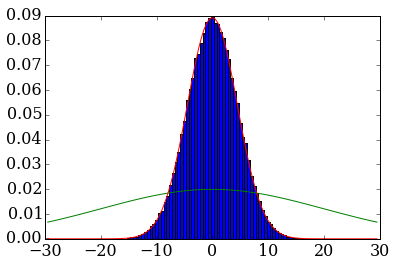

In [7]:
# Generate bins centered around 0
binwidth=0.5
bins=numpy.arange(-30,30,binwidth)
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2


# plot a histrogram for verification
#pyplot.xlim(-5,5)
pyplot.hist(xd[nt],bins,normed=True);
pyplot.plot(bin_centers, numpy.exp(-bin_centers**2/(2.0*alpha**2*T))\
                            / numpy.sqrt(2*numpy.pi*alpha**2*T))
pyplot.plot(bin_centers, numpy.exp(-2*gamma*bin_centers**2/(2.0*alpha**2))\
                            / numpy.sqrt(2*numpy.pi*alpha**2/gamma/2))

In [8]:
from IPython.core.display import HTML
css_file = '../../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())